# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [95]:
pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [96]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /Users/alina/opt/anaconda3/lib/python3.7/site-packages (5.5.0)
Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install --upgrade pandas

Requirement already up-to-date: pandas in /Users/alina/opt/anaconda3/lib/python3.7/site-packages (1.3.5)
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [98]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [99]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [100]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [101]:
df_data.shape

(4324, 9)

In [102]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [103]:
df_data.isna().sum().sum()

3360

In [104]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [105]:
df_data.duplicated().sum()

0

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [106]:
df_data_clean = df_data.dropna()

In [107]:
df_data_clean.isna().sum().sum()

0

## Descriptive Statistics

In [108]:
df_data_clean.describe()

,Unnamed: 0,Unnamed: 0.1
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [109]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      964 non-null    int64 
 1   Unnamed: 0.1    964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [110]:
number_of_launches = df_data_clean.groupby("Organisation").agg({"Detail":"count"})
number_of_launches.sample()

,Detail
Organisation,
Northrop,83


<BarContainer object of 25 artists>

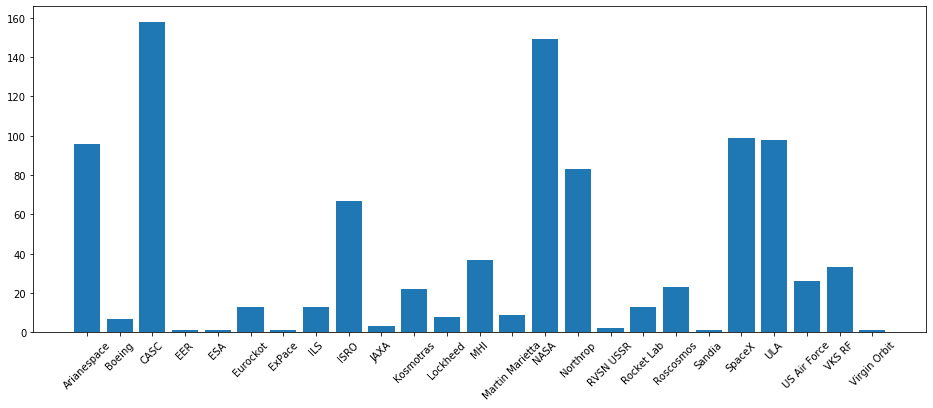

In [111]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
plt.bar(number_of_launches.index, number_of_launches.Detail)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [112]:
df_data_clean.groupby("Rocket_Status").agg({"Detail":"count"})

,Detail
Rocket_Status,
StatusActive,586
StatusRetired,378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [113]:
df_data_clean.groupby("Mission_Status").agg({"Detail":"count"})

,Detail
Mission_Status,
Failure,36
Partial Failure,17
Prelaunch Failure,1
Success,910


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [114]:
type(df_data_clean.Price[0])

str

In [115]:
df_data_clean.Price = df_data_clean["Price"].str.replace(",", "").astype("float")
type(df_data_clean.Price[0])

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



numpy.float64

(array([949.,   0.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([   5.3 ,  504.77, 1004.24, 1503.71, 2003.18, 2502.65, 3002.12,
        3501.59, 4001.06, 4500.53, 5000.  ]),
 <a list of 10 Patch objects>)

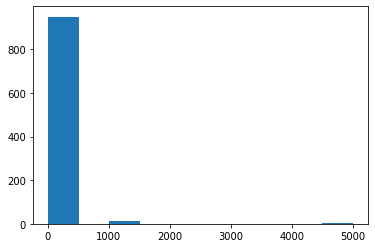

In [116]:
plt.hist(df_data_clean.Price)

In [117]:
df_data_clean.Price.min()

5.3

In [118]:
df_data_clean.Price.max()

5000.0

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [119]:
import plotly.express as px

In [120]:
df_data_clean["Country"] = df_data_clean["Location"].str.split(", ").str[-1]
df_data_clean.Country.value_counts()

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



USA                               487
China                             158
France                             95
India                              67
Russia                             54
Kazakhstan                         46
Japan                              40
New Zealand                        13
Gran Canaria                        2
Yellow Sea                          1
Pacific Missile Range Facility      1
Name: Country, dtype: int64

In [121]:
df_data_clean["Country"] = df_data_clean["Country"].replace("Russia", "Russian Federation")
df_data_clean["Country"] = df_data_clean["Country"].replace("New Mexico", "USA")
df_data_clean["Country"] = df_data_clean["Country"].replace("Yellow Sea", "China")
df_data_clean["Country"] = df_data_clean["Country"].replace("Shahrud Missile Test Site", "Iran")
df_data_clean["Country"] = df_data_clean["Country"].replace("Pacific Missile Range Facility", "USA")
df_data_clean["Country"] = df_data_clean["Country"].replace("Barents Sea", "Russian Federation")
df_data_clean["Country"] = df_data_clean["Country"].replace("Gran Canaria", "USA")
df_data_clean.Country.value_counts()

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

USA                   490
China                 159
France                 95
India                  67
Russian Federation     54
Kazakhstan             46
Japan                  40
New Zealand            13
Name: Country, dtype: int64

In [122]:
pip install country-converter

Note: you may need to restart the kernel to use updated packages.


In [123]:
import country_converter as coco

In [124]:
df_data_clean["Country_Code"] = coco.convert(names=df_data_clean["Country"], to="ISO3")
df_data_clean.Country_Code.value_counts()

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



USA    490
CHN    159
FRA     95
IND     67
RUS     54
KAZ     46
JPN     40
NZL     13
Name: Country_Code, dtype: int64

In [125]:
df_countries = df_data_clean.groupby("Country_Code", as_index=False).agg({"Detail":"count"})
df_countries

,Country_Code,Detail
0,CHN,159
1,FRA,95
2,IND,67
3,JPN,40
4,KAZ,46
5,NZL,13
6,RUS,54
7,USA,490


In [126]:
px.choropleth(df_countries,
              locations="Country_Code",
              color="Detail",
              hover_name="Country_Code",
              color_continuous_scale=px.colors.sequential.matter)

# Use a Choropleth Map to Show the Number of Failures by Country


In [127]:
df_failures = df_data_clean[df_data_clean["Mission_Status"] != "Success"].groupby("Country_Code", as_index=False).agg({"Detail":"count"})
df_failures

,Country_Code,Detail
0,CHN,7
1,FRA,3
2,IND,8
3,KAZ,3
4,NZL,2
5,RUS,3
6,USA,28


In [128]:
px.choropleth(df_failures,
              locations="Country_Code",
              color="Detail",
              hover_name="Country_Code",
              color_continuous_scale=px.colors.sequential.matter)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [129]:
df_sunburst = df_data_clean.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).agg({"Detail":"count"})
df_sunburst.sort_values("Detail", ascending=False).head()

,Country,Organisation,Mission_Status,Detail
2,China,CASC,Success,152
39,USA,NASA,Success,146
49,USA,ULA,Success,97
47,USA,SpaceX,Success,93
6,France,Arianespace,Success,91


In [130]:
px.sunburst(df_sunburst, 
            path=["Country", "Organisation", "Mission_Status"],
            values="Detail")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [131]:
total_money = df_data_clean.groupby("Organisation").agg({"Price":"sum"})
total_money.head()

,Price
Organisation,
Arianespace,"16,345.00"
Boeing,"1,241.00"
CASC,"6,340.26"
EER,20.00
ESA,37.00


<BarContainer object of 964 artists>

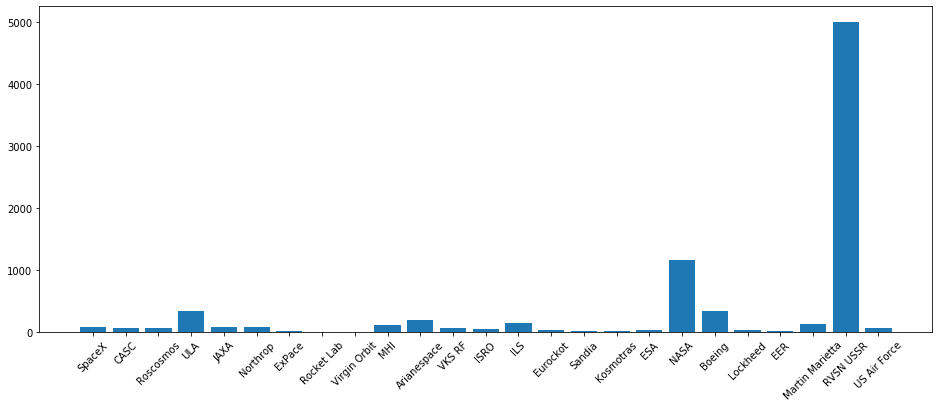

In [132]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
plt.bar(df_data_clean.Organisation, df_data_clean.Price)

# Analyse the Amount of Money Spent by Organisation per Launch

In [133]:
number_of_launches = df_data_clean.groupby("Organisation", as_index=False).agg({"Detail":"count"})
len(number_of_launches)

25

In [134]:
total_money = df_data_clean.groupby("Organisation", as_index=False).agg({"Price":"sum"})
len(total_money)

25

In [135]:
new_df = pd.merge(number_of_launches, total_money, on="Organisation")
len(new_df)

25

In [136]:
new_df.head()

,Organisation,Detail,Price
0,Arianespace,96,"16,345.00"
1,Boeing,7,"1,241.00"
2,CASC,158,"6,340.26"
3,EER,1,20.00
4,ESA,1,37.00


In [137]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Organisation  25 non-null     object 
 1   Detail        25 non-null     int64  
 2   Price         25 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 800.0+ bytes


In [138]:
new_df["Price_per_Launch"] = round(new_df.Price / new_df.Detail, 2)
new_df.head()

,Organisation,Detail,Price,Price_per_Launch
0,Arianespace,96,"16,345.00",170.26
1,Boeing,7,"1,241.00",177.29
2,CASC,158,"6,340.26",40.13
3,EER,1,20.00,20.00
4,ESA,1,37.00,37.00


# Chart the Number of Launches per Year

In [139]:
type(df_data_clean.Date[0])

str

In [140]:
df_data_clean["Date"] = pd.to_datetime(df_data_clean["Date"], utc=True)
type(df_data_clean.Date[0])

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pandas._libs.tslibs.timestamps.Timestamp

In [141]:
df_data_clean["Year"] = pd.DatetimeIndex(df_data_clean["Date"]).year

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
launches_per_year = df_data_clean.groupby("Year", as_index=False).agg({"Detail":"count"})
launches_per_year.head()

,Year,Detail
0,1964,2
1,1965,2
2,1966,3
3,1967,8
4,1968,10


/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



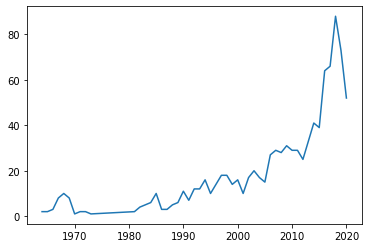

In [143]:
plt.plot(launches_per_year.Year, launches_per_year.Detail)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [144]:
df_data_clean["Year_Month"]  = pd.to_datetime(df_data_clean["Date"]).dt.to_period("M")

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1146: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
df_months = df_data_clean.groupby("Year_Month", as_index=False).agg({"Detail":"count"})
df_months.head()

,Year_Month,Detail
0,1964-09,1
1,1964-12,1
2,1965-02,1
3,1965-05,1
4,1966-07,1


In [146]:
type(df_months.Year_Month[0])

pandas._libs.tslibs.period.Period

In [147]:
df_months["Year_Month"] = df_months["Year_Month"].astype(str)
df_months["Year_Month"] = pd.to_datetime(df_months["Year_Month"])
type(df_months.Year_Month[0])

pandas._libs.tslibs.timestamps.Timestamp

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and wil

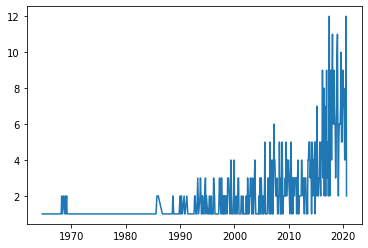

In [148]:
plt.plot(df_months.Year_Month, df_months.Detail)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [149]:
df_data_clean["Month"] = pd.DatetimeIndex(df_data_clean["Date"]).month

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
launches_per_month = df_data_clean.groupby("Month", as_index=False).agg({"Detail":"count"})
launches_per_month.head()

,Month,Detail
0,1,66
1,2,60
2,3,77
3,4,91
4,5,86


/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



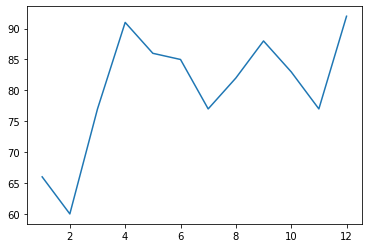

In [151]:
plt.plot(launches_per_month.Month, launches_per_month.Detail)

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [152]:
avg_price = df_data_clean.groupby("Year", as_index=False).agg({"Price":"mean"})
avg_price.head()

,Year,Price
0,1964,63.23
1,1965,63.23
2,1966,59.00
3,1967,196.62
4,1968,279.20


/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



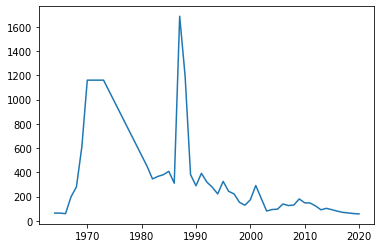

In [153]:
plt.plot(avg_price.Year, avg_price.Price)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [154]:
top_10_orgs = number_of_launches.sort_values(by="Detail", ascending=False).head(10)
top_10_orgs

,Organisation,Detail
2,CASC,158
14,NASA,149
20,SpaceX,99
21,ULA,98
0,Arianespace,96
15,Northrop,83
8,ISRO,67
12,MHI,37
23,VKS RF,33
22,US Air Force,26


In [155]:
org_names = top_10_orgs.Organisation
org_names

2             CASC
14            NASA
20          SpaceX
21             ULA
0      Arianespace
15        Northrop
8             ISRO
12             MHI
23          VKS RF
22    US Air Force
Name: Organisation, dtype: object

In [156]:
org_names = ["CASC", "NASA", "SpaceX", "ULA", "Arianespace", "Northrop", "ISRO", "MHI", "VKS RF", "US Air Force"]

In [157]:
top_10_df = df_data_clean[df_data_clean["Organisation"].isin(org_names)]
top_10_df.sample()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Year_Month,Month
1779,1779,1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,USA,1990,1990-12,12


In [158]:
top_10_df = top_10_df.groupby(["Organisation", "Year"], as_index=False).agg({"Detail":"count"})
top_10_df.head()

,Organisation,Year,Detail
0,Arianespace,2002,1
1,Arianespace,2004,3
2,Arianespace,2005,2
3,Arianespace,2006,5
4,Arianespace,2007,4


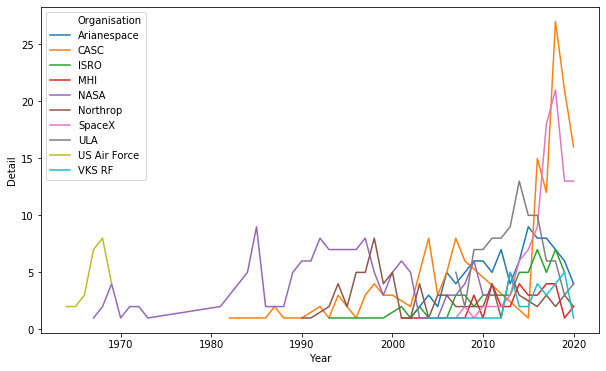

In [159]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Detail", hue="Organisation", data=top_10_df)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [160]:
cold_war = df_data_clean[df_data_clean.Year <= 1991]
cold_war = cold_war.loc[cold_war.Country_Code.isin(["USA", "RUS", "KAZ"])]
len(cold_war)

92

In [161]:
usa =  cold_war.loc[cold_war.Country_Code == "USA"]
len(usa)

90

In [162]:
ussr =  cold_war.loc[cold_war.Country_Code.isin(["RUS", "KAZ"])]
len(ussr)

2

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

([<matplotlib.patches.Wedge at 0x7fb0855db150>,
 [Text(-1.097435647331897, 0.07506663683168754, 'USA'),
  Text(1.0974356486496928, -0.07506661756618623, 'USSR')])

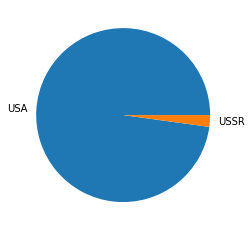

In [163]:
countries = ["USA", "USSR"]
data = [90, 2]

plt.pie(data, labels=countries)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [164]:
df_years = cold_war.groupby(["Country", "Year"], as_index=False).agg({"Detail":"count"})
len(df_years)

22

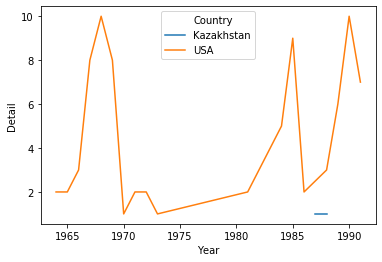

In [165]:
sns.lineplot(x="Year", y="Detail", hue="Country", data=df_years)

## Chart the Total Number of Mission Failures Year on Year.

In [166]:
cold_war.Mission_Status.value_counts()

Success            85
Failure             4
Partial Failure     3
Name: Mission_Status, dtype: int64

In [167]:
failure = cold_war[cold_war["Mission_Status"] != "Success"].groupby(["Mission_Status", "Year"], as_index=False).agg({"Detail":"count"})
failure

,Mission_Status,Year,Detail
0,Failure,1964,1
1,Failure,1967,1
2,Failure,1986,1
3,Failure,1990,1
4,Partial Failure,1967,1
5,Partial Failure,1968,1
6,Partial Failure,1991,1


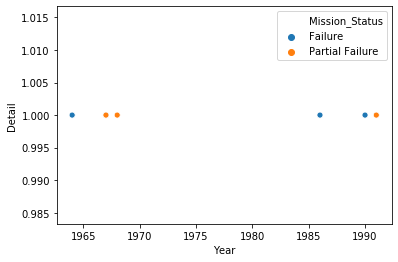

In [168]:
sns.scatterplot(x="Year", y="Detail", hue="Mission_Status", data=failure)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [169]:
failure_over_time = cold_war[cold_war["Mission_Status"] != "Success"].groupby("Year", as_index=False).agg({"Detail":"count"})
failure_over_time

,Year,Detail
0,1964,1
1,1967,2
2,1968,1
3,1986,1
4,1990,1
5,1991,1


In [170]:
success_over_time = cold_war[cold_war["Mission_Status"] == "Success"].groupby("Year", as_index=False).agg({"Detail":"count"})
success_over_time

,Year,Detail
0,1964,1
1,1965,2
2,1966,3
3,1967,6
4,1968,9
5,1969,8
6,1970,1
7,1971,2
8,1972,2
9,1973,1


In [171]:
new_df = pd.merge(failure_over_time, success_over_time, on="Year", how="right")
new_df.fillna(0, inplace=True)

In [172]:
new_df["Percentage"] = round(new_df["Detail_x"] / new_df["Detail_y"] * 100, 2)
new_df.sample()

,Year,Detail_x,Detail_y,Percentage
18,1989,0.00,6,0.00


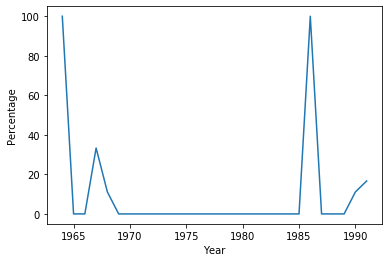

In [173]:
sns.lineplot(new_df.Year, new_df.Percentage)

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [174]:
df_lead = df_data_clean.groupby(["Year", "Country"], as_index=False).agg({"Detail":"count"})
df_lead.head()

,Year,Country,Detail
0,1964,USA,2
1,1965,USA,2
2,1966,USA,3
3,1967,USA,8
4,1968,USA,10


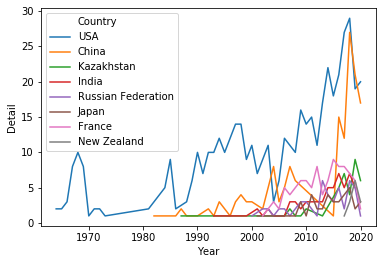

In [175]:
sns.lineplot(x="Year", y="Detail", hue="Country", data=df_lead)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [176]:
number_over_years = df_data_clean.groupby(["Organisation", "Year"], as_index=False).agg({"Detail":"count"})
number_over_years.sample()

,Organisation,Year,Detail
186,Northrop,2000,5


In [177]:
number_over_years.sort_values(by=["Year", "Detail"], ascending=False)

,Organisation,Year,Detail
50,CASC,2020,16
231,SpaceX,2020,13
17,Arianespace,2020,4
216,Roscosmos,2020,4
245,ULA,2020,4
...,...,...,...
249,US Air Force,1967,7
141,NASA,1967,1
248,US Air Force,1966,3
247,US Air Force,1965,2


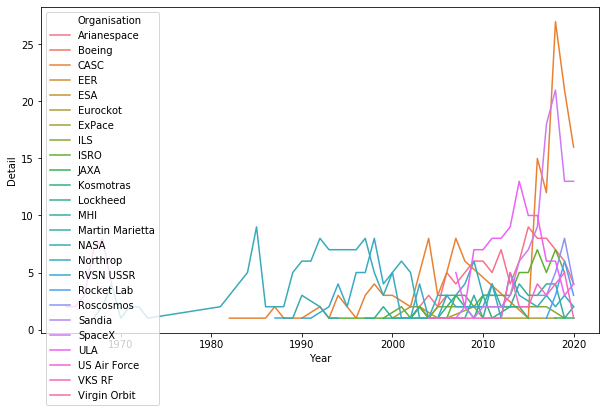

In [178]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Detail", hue="Organisation", data=number_over_years)